### 복습

In [1]:
import cv2
import numpy as np
import sys
import matplotlib.pyplot as plt
import os

#### 트랙바로 조정

In [ ]:
def call_track(pos):
    hmin = cv2.getTrackbarPos('h_min', 'dst')
    hmax = cv2.getTrackbarPos('h_max', 'dst')
    smin = cv2.getTrackbarPos('s_min', 'dst')
    dst = cv2.inRange(img_hsv, (hmin, smin, 0), (hmax, 255, 255)) # H, S, V 순서임
    cv2.imshow('dst', dst)

img = cv2.imread('./fig/palette.png')
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

if img is None:
    print('image read failed')
    sys.exit()

cv2.imshow('img', img)
cv2.namedWindow('dst')
cv2.createTrackbar('h_min', 'dst', 0, 179, call_track)
cv2.createTrackbar('h_max', 'dst', 50, 179, call_track)
cv2.createTrackbar('s_min', 'dst', 0, 255, call_track)
# cv2.createTrackbar('s_max', 'dst', 100, 255, call_track)

cv2.waitKey()
cv2.destroyAllWindows()

#### 히스토그램 평활화

In [ ]:
src = cv2.imread('./fig/autumn.jpg', cv2.IMREAD_REDUCED_COLOR_4)

src_hsv = cv2.cvtColor(src, cv2.COLOR_BGR2HSV)

h, s, v = cv2.split(src_hsv)

v_eqaul = cv2.equalizeHist(v) # 균일분포를 따르게 해줌
v_norm = cv2.normalize(v, None, 0, 255, cv2.NORM_MINMAX)

src_eqaul = cv2.merge((h, s, v_eqaul))
src_norm = cv2.merge((h, s, v_norm))

src_eqaul = cv2.cvtColor(src_eqaul, cv2.COLOR_HSV2BGR)
src_norm = cv2.cvtColor(src_norm, cv2.COLOR_HSV2BGR)

cv2.imshow('src', src)
cv2.imshow('src_equal', src_eqaul)
cv2.imshow('src_norm', src_norm)
cv2.waitKey()
cv2.destroyAllWindows()

In [ ]:
src = cv2.imread('./fig/lenna.bmp')

# hist = cv2.calcHist([src], [0], None, [256], [0,256])
hist_b = cv2.calcHist([src], [0], None, [256], [0,256])
hist_g = cv2.calcHist([src], [1], None, [256], [0,256])
hist_r = cv2.calcHist([src], [2], None, [256], [0,256])

cv2.imshow('src', src)
cv2.waitKey()
cv2.destroyAllWindows()

# plt.plot(hist)
plt.plot(hist_b, c = 'b')
plt.plot(hist_g, c = 'g')
plt.plot(hist_r, c = 'r')
plt.show()

In [ ]:
src1 = cv2.imread('./fig/lenna256.bmp', 0)
src2 = np.zeros_like(src1, np.uint8)
cv2.circle(src2, (128, 128), 100, 200, -1)
cv2.circle(src2, (128, 128), 50, 100, -1)

dst1 = cv2.add(src1, src2)
dst2 = cv2.addWeighted(src1, 0.5, src2, 0.5, 0. )
dst3 = cv2.subtract(src1, src2)
dst4 = cv2.absdiff(src1, src2)


cv2.imshow('src1', src1)
cv2.imshow('src2', src2)
cv2.imshow('dst1', dst1)
cv2.imshow('dst2', dst2)
cv2.imshow('dst3', dst3)
cv2.imshow('dst4', src2)
cv2.waitKey()
cv2.destroyAllWindows()

#### 마우스 콜백 (글자 쓸때, 가능하면 외우기)

In [ ]:
def call_mouse(event, x, y, flags, param):
    global old_x, old_y
    if event == cv2.EVENT_LBUTTONDOWN:
        old_x, old_y = x, y
    elif event == cv2.EVENT_MOUSEMOVE:
        if flags == cv2.EVENT_FLAG_LBUTTON:
            cv2.line(img, (old_x, old_y), (x, y), (0, 0, 255), 5, cv2.LINE_AA)
            cv2.imshow('img', img)
            old_x, old_y = x, y

img = np.ones((600, 1000, 3), np.uint8) * 255
cv2.namedWindow('img')
cv2.setMouseCallback('img', call_mouse)

cv2.imshow('img', img)
cv2.waitKey()
cv2.destroyAllWindows()

#### 동영상

In [ ]:
cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print('video read failed')
    sys.exit()

w = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
h = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = int(cap.get(cv2.CAP_PROP_FPS))
fourcc = cv2.VideoWriter_fourcc(*'DIVX')

output = cv2.VideoWriter('output.avi', fourcc, fps, (w, h))

while True:
    ret, frame = cap.read()

    if not ret:
        print('frame read failed')
        break
    
    output.write(frame)
    cv2.imshow('frame', frame)
    if cv2.waitKey(20) == 27:
        break

cap.release()
output.release()
cv2.destroyAllWindows()


In [ ]:
img = np.ones((600, 1000, 3), np.uint8) * 255
cv2.line(img, (30, 100), (200, 100), (0, 0, 255), 10)
cv2.arrowedLine(img, (200, 100), (200, 400), (0, 255, 0), 10)
cv2.rectangle(img, (30, 400), (200, 500), (255, 0, 0), 10)
cv2.rectangle(img, (350, 100, 500, 250), (100, 100, 100), 10)
cv2.circle(img, (400, 300), 100, (0, 100, 100), -1)
# cv2.ellipse(img, (800, 300), (50, 100), 90, 0, 270)
cv2.putText(img, 'Good Afternoon!', (300, 200), cv2.FONT_ITALIC, 2, (0, 0, 150), 2)

cv2.imshow('img', img)
cv2.waitKey()
cv2.destroyAllWindows()

## ※. image classifcation

In [12]:
import cv2
import numpy as np
import sys
import matplotlib.pyplot as plt
import os
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras.applications.vgg16 import VGG16

### vgg16

In [ ]:
vgg16_pretrained = VGG16(weights = 'imagenet', include_top = True) # 파인 튜닝을 위해서 가중치만 살리고 뒤에꺼는 안가져옴. 학습할 필요 없음.

In [ ]:
vgg16_pretrained.summary() # 이미지 224 x 224로 가져와야함. RGB인지 BGR인지 확인해야 함.

In [ ]:
img_path = './img/dog3.jpg'
img = keras.preprocessing.image.load_img(img_path, target_size = (224, 224)) # RGB로 읽음
x = keras.preprocessing.image.img_to_array(img) # 넘파이 array 타입으로 바꿔야 함
x = np.expand_dims(x, axis = 0) # 디멘젼 앞에 1을 넣어야 함. (1, 224, 224, 3) 처럼 바꿈.
x = keras.applications.vgg16.preprocess_input(x) # vgg16에 맞게 전처리 해줌.

output = vgg16_pretrained.predict(x) # 1000개 중에 확률이 나옴.
classNames = keras.applications.vgg16.decode_predictions(output, top = 3) # 결과에서 top 3를 나타냄.
print(classNames[0][0][1], classNames[0][0][2])

# print(output)


# print(type(img), type(x), x.dtype, x.shape)

img = cv2.imread(img_path, cv2.IMREAD_REDUCED_COLOR_4)
# img = cv2.imread(img_path)
text = f'{classNames[0][0][1]}, {classNames[0][0][2]*100:.2f}%'
cv2.putText(img, text, (50, 50), cv2.FONT_ITALIC, 2, (0, 0, 255), 2, cv2.LINE_AA)

cv2.imshow('img', img)
cv2.waitKey()
cv2.destroyAllWindows()

### densenet

In [15]:
from tensorflow.keras.applications.densenet import DenseNet201

In [16]:
dense201_pretrained = DenseNet201(weights = 'imagenet', include_top = True) # 파인 튜닝을 위해서 가중치만 살리고 뒤에꺼는 안가져옴. 학습할 필요 없음.

In [ ]:
dense201_pretrained.summary() # 이미지 224 x 224로 가져와야함. RGB인지 BGR인지 확인해야 함.

In [ ]:
img_path = './img/dog6.png'
img = keras.preprocessing.image.load_img(img_path, target_size = (224, 224)) # RGB로 읽음
x = keras.preprocessing.image.img_to_array(img) # 넘파이 array 타입으로 바꿔야 함
x = np.expand_dims(x, axis = 0) # 디멘젼 앞에 1을 넣어야 함. (1, 224, 224, 3) 처럼 바꿈.
x = keras.applications.densenet.preprocess_input(x) # vgg16에 맞게 전처리 해줌.

output = dense201_pretrained.predict(x) # 1000개 중에 확률이 나옴.
classNames = keras.applications.densenet.decode_predictions(output, top = 3) # 결과에서 top 3를 나타냄.
print(classNames[0][0][1], classNames[0][0][2])

# print(output)


# print(type(img), type(x), x.dtype, x.shape)

# img = cv2.imread(img_path, cv2.IMREAD_REDUCED_COLOR_4)
img = cv2.imread(img_path)
text = f'{classNames[0][0][1]}, {classNames[0][0][2]*100:.2f}%'
cv2.putText(img, text, (50, 50), cv2.FONT_ITALIC, 2, (0, 0, 255), 2, cv2.LINE_AA)

cv2.imshow('img', img)
cv2.waitKey()
cv2.destroyAllWindows()

### inception

In [9]:
# from tensorflow.keras.applications.densenet import DenseNet201
from tensorflow.keras.applications.inception_v3 import InceptionV3

In [10]:
img_path = ('./img/niro.jpg')
inceptionv3_pretrained = InceptionV3(weights='imagenet', include_top=True)
inceptionv3_pretrained.summary()

2023-03-02 14:22:40.285647: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:961] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-03-02 14:22:40.322369: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:961] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-03-02 14:22:40.322731: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:961] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-03-02 14:22:40.324124: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 149, 149, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 149, 149, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                      

In [22]:
img = keras.preprocessing.image.load_img(img_path, target_size=(299, 299))
x = keras.preprocessing.image.img_to_array(img) # 넘파이로 변경
x = np.expand_dims(x, axis=0) # 디멘션 1 추가
x = keras.applications.inception_v3.preprocess_input(x)

output = inceptionv3_pretraiend.predict(x)
classNames = keras.applications.inception_v3.decode_predictions(output, top = 3)

print(classNames)

1/1 [==============================] - 0s 36ms/step
[[('n03459775', 'grille', 0.522783), ('n04285008', 'sports_car', 0.25713208), ('n03100240', 'convertible', 0.06751615)]]


#### opencv로 전처리 방법

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(1, 299, 299, 3) float32


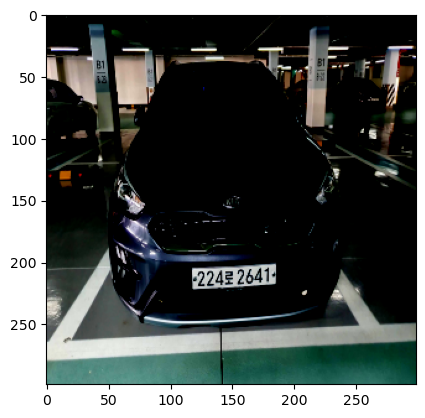

In [7]:
img_path = ('./img/niro.jpg')
img = cv2.imread(img_path)
img = cv2.resize(img, (299, 299), interpolation=cv2.INTER_AREA)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB).reshape(1, 299, 299, 3).astype(np.float32)
img /= 255.
img -= 0.5
img *= 2.

print(img.shape, img.dtype)

plt.imshow(img[0])
plt.show()

In [13]:
output_cv = inceptionv3_pretrained.predict(img)
keras.applications.inception_v3.decode_predictions(output_cv, top = 3)

1/1 [==============================] - 0s 26ms/step


[[('n03459775', 'grille', 0.53168106),
  ('n04285008', 'sports_car', 0.20985581),
  ('n03770679', 'minivan', 0.06040018)]]

### GoogleNet (github 다운로드 후 방법)

In [ ]:
filename = ('./googlenet/fig/airplane_1.jpg')

img = cv2.imread(filename, 1)

if img is None:
    print('image read failed')
    sys.exit()

### 1. caffe network
model = ('./googlenet/bvlc_googlenet.caffemodel')
config = ('./googlenet/deploy.prototxt')

net = cv2.dnn.readNet(model, config)

if net.empty():
    print('net load failed')
    sys.exit()

classNames = []

with open('./googlenet/classification_classes_ILSVRC2012.txt', 'rt') as f:
    classNames = f.read().rstrip('\n').split('\n') # 마지막 빈 줄 지운다

# print(classNames)

### 2. blob
blob = cv2.dnn.blobFromImage(img, 1, (224, 224), (104, 117, 123), swapRB = False)
net.setInput(blob)
prob = net.forward()

# print(prob)

### 3. result
out = prob.flatten()
max_index = np.argmax(out)
confidence = out[max_index]
class_name = classNames[max_index]

text = f'{class_name}, {confidence*100:.2f}%'
cv2.putText(img, text, (50, 50), cv2.FONT_ITALIC, 2, (0, 0, 255), 2, cv2.LINE_AA)

cv2.imshow('img', img)
cv2.waitKey()
cv2.destroyAllWindows()

In [59]:
import glob

In [66]:
# img_files = glob.glob('./fig/images/*.*')
filename = glob.glob('./googlenet/fig/*.*')

cv2.namedWindow('scene', cv2.WINDOW_NORMAL)
# cv2.setWindowProperty('scene', cv2.WND_PROP_FULLSCREEN, cv2.WINDOW_FULLSCREEN)

### 1. caffe network
model = ('./googlenet/bvlc_googlenet.caffemodel')
config = ('./googlenet/deploy.prototxt')

net = cv2.dnn.readNet(model, config)

if net.empty():
    print('net load failed')
    sys.exit()

classNames = []

with open('./googlenet/classification_classes_ILSVRC2012.txt', 'rt') as f:
    classNames = f.read().rstrip('\n').split('\n') # 마지막 빈 줄 지운다

idx = 0

while True:
    img = cv2.imread(filename[idx])
    text = 'dd'
    
    if img is None:
        print('image read failed')
        break

    blob = cv2.dnn.blobFromImage(img, 1, (224, 224), (104, 117, 123), swapRB = False)
    net.setInput(blob)
    prob = net.forward()

    out = prob.flatten()
    max_index = np.argmax(out)
    confidence = out[max_index]
    class_name = classNames[max_index]

    text = f'{class_name}, {confidence*100:.2f}%'
    cv2.putText(img, text, (50, 50), cv2.FONT_ITALIC, 2, (0, 0, 255), 2, cv2.LINE_AA)
    
    cv2.imshow('scene', img)
    cv2.putText(img, text, (50, 50), cv2.FONT_ITALIC, 2, (0, 0, 255), 2, cv2.LINE_AA)

    if cv2.waitKey(3000) == 27:
        break
    
    idx += 1
    if idx >= len(filename):
        idx=0

cv2.destroyAllWindows()

QObject::moveToThread: Current thread (0x25b31f0) is not the object's thread (0x1da64c50).
Cannot move to target thread (0x25b31f0)

QObject::moveToThread: Current thread (0x25b31f0) is not the object's thread (0x1da64c50).
Cannot move to target thread (0x25b31f0)

QObject::moveToThread: Current thread (0x25b31f0) is not the object's thread (0x1da64c50).
Cannot move to target thread (0x25b31f0)

QObject::moveToThread: Current thread (0x25b31f0) is not the object's thread (0x1da64c50).
Cannot move to target thread (0x25b31f0)

QObject::moveToThread: Current thread (0x25b31f0) is not the object's thread (0x1da64c50).
Cannot move to target thread (0x25b31f0)

QObject::moveToThread: Current thread (0x25b31f0) is not the object's thread (0x1da64c50).
Cannot move to target thread (0x25b31f0)

QObject::moveToThread: Current thread (0x25b31f0) is not the object's thread (0x1da64c50).
Cannot move to target thread (0x25b31f0)

QObject::moveToThread: Current thread (0x25b31f0) is not the object's